In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




# **Pré-processamento**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Imoveis/lista_imoveis_2.csv")

In [ ]:
data.head()

,Tipo_Imovel,Construtora,Empreendimento,Status,Area,Preco,Valor_M,Bairro,Endereco,Cidade,...,Tomada_USB,Fechadura_Eletronica,WC,DCE,Vaga_Garagem,Elevador,Portaria_24h,Gerador,Central_Gas,Bicicletario
0,Apartamento,ALLIANCE,Selleto Life Style,Pronto,156.69,1356249.52,8655.62,Altiplano Cabo Branco,"Rua Josita Almeida, 76",João Pessoa,...,0,0,4,1,3,1,1,1,1,1
1,Casa Condomínio,ALLIANCE,Alliance House,Em construção,177.12,1627452.16,9188.42,Intermares,Rodovia BR-230,Cabedelo,...,0,0,4,0,2,0,1,0,1,1
2,Sala Comercial,ALLIANCE,Altiplex José Olímpio,Pronto,48.61,459518.62,9453.17,Altiplano Cabo Branco,"Avenida João Cirilo da Silva, 221",João Pessoa,...,0,0,1,0,1,1,1,1,0,0
3,Apartamento,ALLIANCE,Blue Beach,Em construção,66.36,1123630.70,16932.35,Praia Formosa,"Rua Pedro Gonzaga de Lima, 252",Cabedelo,...,0,0,2,0,1,1,1,1,1,1
4,Apartamento,ALLIANCE,Mansões Wellington Barreto,Pronto,414.00,3431958.88,8289.76,Altiplano Cabo Branco,"Rua Severino Garcia Galvão, 101",João Pessoa,...,0,0,6,1,4,1,1,1,1,1


In [ ]:
data.info

<bound method DataFrame.info of           Tipo_Imovel              Construtora              Empreendimento  \
0         Apartamento                 ALLIANCE          Selleto Life Style   
1     Casa Condomínio                 ALLIANCE              Alliance House   
2      Sala Comercial                 ALLIANCE       Altiplex José Olímpio   
3         Apartamento                 ALLIANCE                  Blue Beach   
4         Apartamento                 ALLIANCE  Mansões Wellington Barreto   
...               ...                      ...                         ...   
3037      Apartamento       FUTURA CONSTRUTORA                Terra Mar II   
3038      Apartamento       FUTURA CONSTRUTORA                Terra Mar II   
3039      Apartamento  LAURA MARIZ CONSTRUÇÕES                   LM Parque   
3040      Apartamento        DELTA CONSTRUTORA                        Thai   
3041      Apartamento       COMETA CONSTRUTORA               Monte Carmelo   

             Status    Area    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo_Imovel           3042 non-null   object 
 1   Construtora           3042 non-null   object 
 2   Empreendimento        3042 non-null   object 
 3   Status                3042 non-null   object 
 4   Area                  3042 non-null   float64
 5   Preco                 3042 non-null   float64
 6   Valor_M               3042 non-null   float64
 7   Bairro                3042 non-null   object 
 8   Endereco              3042 non-null   object 
 9   Cidade                3042 non-null   object 
 10  Estado                3042 non-null   object 
 11  Terreo                3042 non-null   int64  
 12  Andar                 3042 non-null   object 
 13  Beira_Mar             3042 non-null   int64  
 14  Qtde_Quartos          3042 non-null   int64  
 15  Qtde_Suites          

In [ ]:
data.columns

Index(['Tipo_Imovel', 'Construtora', 'Empreendimento', 'Status', 'Area',
       'Preco', 'Valor_M', 'Bairro', 'Endereco', 'Cidade', 'Estado', 'Terreo',
       'Andar', 'Beira_Mar', 'Qtde_Quartos', 'Qtde_Suites', 'Suite_Master',
       'Closet', 'Tomada_USB', 'Fechadura_Eletronica', 'WC', 'DCE',
       'Vaga_Garagem', 'Elevador', 'Portaria_24h', 'Gerador', 'Central_Gas',
       'Bicicletario'],
      dtype='object')

In [ ]:
# Excluir a coluna 'Terreo'
data = data.drop('Terreo', axis=1)

In [ ]:
# Mostrar os tipos de imóveis presentes na coluna 'Tipo_Imovel'
tipos_imovel = data['Tipo_Imovel'].value_counts()

print(tipos_imovel)

Apartamento           2298
Flat                   414
Sala Comercial          96
Cobertura Duplex        54
Casa                    48
Terreno                 48
Loja                    30
Casa Condomínio         24
Cobertura               24
Terreno Condomínio       6
Name: Tipo_Imovel, dtype: int64


In [ ]:
# Mapeamento dos tipos de imóveis para números
tipo_imovel_mapping = {
    'Apartamento': 0,
    'Flat': 1,
    'Sala Comercial': 2,
    'Cobertura Duplex': 3,
    'Casa': 4,
    'Terreno': 5,
    'Loja': 6,
    'Casa Condomínio': 7,
    'Cobertura': 8,
    'Terreno Condomínio': 9
}


# Substituir os tipos de imóveis pelos números no DataFrame
data['Tipo_Imovel'] = data['Tipo_Imovel'].map(tipo_imovel_mapping)

# Mostrar os tipos de imóveis presentes no DataFrame
tipos_imovel_numeros = data['Tipo_Imovel'].value_counts()

print(tipos_imovel_numeros)

0    2298
1     414
2      96
3      54
4      48
5      48
6      30
7      24
8      24
9       6
Name: Tipo_Imovel, dtype: int64


In [ ]:
# Mostrar os Status de imóveis presentes na coluna 'Status'
status = data['Status'].value_counts()

print(status)

Em construção    1596
Avulso            738
Pronto            708
Name: Status, dtype: int64


In [ ]:
# Mapeamento dos Status de imóveis para números
status_mapping = {
    'Em construção':0,
    'Avulso': 1,
    'Pronto': 2
}

# Substituir os Status pelos números no DataFrame
data['Status'] = data['Status'].map(status_mapping)

# Mostrar os Status de imóveis presentes no DataFrame
status_numeros = data['Status'].value_counts()

print(status_numeros)

0    1596
1     738
2     708
Name: Status, dtype: int64


In [ ]:
# Mostrar os andares de imóveis presentes na coluna 'Andar'
andar = data['Andar'].value_counts()

print(andar)

1º ao 5º        2538
Térreo           330
6º ao 10º         84
11º ao 15º        42
16º ao 20º        36
Acima do 20º      12
Name: Andar, dtype: int64


In [ ]:
# Mapeamento dos andares de imóveis para números
andar_mapping = {
    '1º ao 5º': 0,
    'Térreo': 1,
    '6º ao 10º': 2,
    '11º ao 15º': 3,
    '16º ao 20º ': 4,
    'Acima do 20º': 5
}


# Substituir os andares pelos números no DataFrame
data['Andar'] = data['Andar'].map(andar_mapping)

# Mostrar os tipos de imóveis presentes no DataFrame
andar_numeros = data['Andar'].value_counts()

print(andar_numeros)

0.0    2538
1.0     330
2.0      84
3.0      42
5.0      12
Name: Andar, dtype: int64


In [ ]:
# Identificar as linhas com valores nulos em 'Andar'
linhas_nulas_andar = data[data['Andar'].isnull()]
linhas_nulas_andar


,Tipo_Imovel,Construtora,Empreendimento,Status,Area,Preco,Valor_M,Bairro,Endereco,Cidade,...,Tomada_USB,Fechadura_Eletronica,WC,DCE,Vaga_Garagem,Elevador,Portaria_24h,Gerador,Central_Gas,Bicicletario
13,0,GRUPO MAIA,Vista do Vale,2,68.60,470000.0,6851.31,Estados,"Rua Manoel Madruga, 488",João Pessoa,...,0,0,2,0,1,1,1,1,1,0
46,0,JE CONSTRUCOES,Miramar Park,2,71.76,513712.0,7158.75,Miramar,"Rua Carlos Barros, 288",João Pessoa,...,0,0,2,0,2,0,1,0,0,0
54,0,ECIISA,Gilberto Freyre,2,165.00,1155000.0,7000.00,Brisamar,Rua Maria Facunda de Oliveira Dias,João Pessoa,...,0,0,4,1,3,1,1,1,1,0
318,0,AVULSO,Vuarnet Residence,1,49.19,325000.0,6607.03,Miramar,"Rua Yaya de Amorim Coutinho, 33",João Pessoa,...,0,0,1,0,1,1,1,1,0,0
344,0,AVULSO,Maralto,1,245.03,2500000.0,10202.83,Altiplano Cabo Branco,"Rua Bancário Elias Feliciano Madruga, 41",João Pessoa,...,0,0,5,1,4,1,1,0,0,0
461,0,AVULSO,Brisa do Atlântico,1,148.00,760000.0,5135.14,João Agripino,"Rua José Brasilino Leite, 75",João Pessoa,...,0,0,5,1,3,1,1,0,0,0
520,0,GRUPO MAIA,Vista do Vale,2,68.60,470000.0,6851.31,Estados,"Rua Manoel Madruga, 488",João Pessoa,...,0,0,2,0,1,1,1,1,1,0
553,0,JE CONSTRUCOES,Miramar Park,2,71.76,513712.0,7158.75,Miramar,"Rua Carlos Barros, 288",João Pessoa,...,0,0,2,0,2,0,1,0,0,0
561,0,ECIISA,Gilberto Freyre,2,165.00,1155000.0,7000.00,Brisamar,Rua Maria Facunda de Oliveira Dias,João Pessoa,...,0,0,4,1,3,1,1,1,1,0
825,0,AVULSO,Vuarnet Residence,1,49.19,325000.0,6607.03,Miramar,"Rua Yaya de Amorim Coutinho, 33",João Pessoa,...,0,0,1,0,1,1,1,1,0,0


In [ ]:
# Preencher os valores nulos em 'Andar' com 5.0
data['Andar'].fillna(4.0, inplace=True)

# Verificar se os valores nulos foram preenchidos corretamente
linhas_nulas_andar = data[data['Andar'].isnull()]
print(linhas_nulas_andar)

Empty DataFrame
Columns: [Tipo_Imovel, Construtora, Empreendimento, Status, Area, Preco, Valor_M, Bairro, Endereco, Cidade, Estado, Andar, Beira_Mar, Qtde_Quartos, Qtde_Suites, Suite_Master, Closet, Tomada_USB, Fechadura_Eletronica, WC, DCE, Vaga_Garagem, Elevador, Portaria_24h, Gerador, Central_Gas, Bicicletario]
Index: []

[0 rows x 27 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo_Imovel           3042 non-null   int64  
 1   Construtora           3042 non-null   object 
 2   Empreendimento        3042 non-null   object 
 3   Status                3042 non-null   int64  
 4   Area                  3042 non-null   float64
 5   Preco                 3042 non-null   float64
 6   Valor_M               3042 non-null   float64
 7   Bairro                3042 non-null   object 
 8   Endereco              3042 non-null   object 
 9   Cidade                3042 non-null   object 
 10  Estado                3042 non-null   object 
 11  Andar                 3042 non-null   float64
 12  Beira_Mar             3042 non-null   int64  
 13  Qtde_Quartos          3042 non-null   int64  
 14  Qtde_Suites           3042 non-null   int64  
 15  Suite_Master         

In [ ]:
# Mostrar os bairros de imóveis presentes na coluna 'Bairro'
bairro = data['Bairro'].value_counts()

print(bairro)

Jardim Oceania                 414
Cabo Branco                    312
Intermares                     306
Manaíra                        252
Bessa                          228
Tambaú                         144
Bancários                      108
Altiplano Cabo Branco          102
Aeroclube                      102
Miramar                         96
Estados                         90
Praia Formosa                   72
Camboinha                       72
Ponta de Campina                72
Jardim Cidade Universitária     60
Poço                            60
Brisamar                        48
Tambauzinho                     48
Expedicionários                 36
Portal do Sol                   36
Cidade dos Colibris             30
João Agripino                   30
Jaguaribe                       30
Centro                          30
Cristo Redentor                 24
Areia Dourada                   18
Jardim São Paulo                18
Parque Verde                    18
Torre               

In [ ]:
# Mapeamento dos bairros de imóveis para números
bairro_mapping = {
    'Jardim Oceania': 0,
    'Cabo Branco': 1,
    'Intermares': 2,
    'Manaíra': 3,
    'Bessa': 4,
    'Tambaú': 5,
    'Bancários': 6,
    'Altiplano Cabo Branco': 7,
    'Aeroclube': 8,
    'Miramar': 9,
    'Estados': 10,
    'Praia Formosa': 11,
    'Camboinha': 12,
    'Ponta de Campina': 13,
    'Jardima Cidade Universitária': 14,
    'Poço': 15,
    'Brisamar': 16,
    'Tambauzinho': 17,
    'Expedicionários': 18,
    'Portal do Sol': 19,
    'Cidade dos Colibris': 20,
    'João Agripino': 21,
    'Jaguaribe': 22,
    'Centro': 23,
    'Cristo Redentor': 24,
    'Areia Dourada': 25,
    'Jardim São Paulo': 26,
    'Parque Verde': 27,
    'Torre': 28,
    'Treze de Maio': 29,
    'Ponta do Seixas': 30,
    'Anatólia': 31,
    'José Américo de Almeida': 32,
    'Pedro Gondim': 33,
    'Tambiá': 34,
    'Planalto Boa Esperança': 35,
    'Gramame': 36,
    'Jardim Veneza': 37,
    'Ernesto Geisel': 38,
    'Água Fria': 39,
    'Jardim Luna': 40,
    'Valentina de Figueiredo': 41,
    'Jardim Brasília': 42,
    'Castelo Branco': 43,
    'Cuiá': 44,
    'João Paulo II': 45,
    'Formosa': 46,
    'Ipês': 47,
    'Oitizeiro': 48
}

# Substituir os bairos pelos números no DataFrame
data['Bairro'] = data['Bairro'].map(bairro_mapping)

# Mostrar os bairros dos imóveis presentes no DataFrame
bairro_numeros = data['Bairro'].value_counts()

print(bairro_numeros)

0     414
1     312
2     306
3     252
4     228
5     144
6     108
7     102
8     102
9      96
10     90
11     72
12     72
13     72
14     60
15     60
16     48
17     48
18     36
19     36
20     30
21     30
22     30
23     30
24     24
25     18
26     18
27     18
28     18
29     12
30     12
31     12
32     12
33     12
34     12
35     12
36     12
37      6
38      6
39      6
40      6
41      6
42      6
43      6
44      6
45      6
46      6
47      6
48      6
Name: Bairro, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo_Imovel           3042 non-null   int64  
 1   Construtora           3042 non-null   object 
 2   Empreendimento        3042 non-null   object 
 3   Status                3042 non-null   int64  
 4   Area                  3042 non-null   float64
 5   Preco                 3042 non-null   float64
 6   Valor_M               3042 non-null   float64
 7   Bairro                3042 non-null   int64  
 8   Endereco              3042 non-null   object 
 9   Cidade                3042 non-null   object 
 10  Estado                3042 non-null   object 
 11  Andar                 3042 non-null   float64
 12  Beira_Mar             3042 non-null   int64  
 13  Qtde_Quartos          3042 non-null   int64  
 14  Qtde_Suites           3042 non-null   int64  
 15  Suite_Master         

In [ ]:
# Mostrar os bairros de imóveis presentes na coluna 'Bairro'
cidade = data['Cidade'].value_counts()

print(cidade)

João Pessoa    2412
Cabedelo        630
Name: Cidade, dtype: int64


In [ ]:
# Mapeamento dos bairros de imóveis para números
cidade_mapping = {
    'João Pessoa': 0,
    'Cabedelo': 1
}

# Substituir os bairos pelos números no DataFrame
data['Cidade'] = data['Cidade'].map(cidade_mapping)

# Mostrar os bairros dos imóveis presentes no DataFrame
cidade_numeros = data['Cidade'].value_counts()

print(cidade_numeros)

0    2412
1     630
Name: Cidade, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tipo_Imovel           3042 non-null   int64  
 1   Construtora           3042 non-null   object 
 2   Empreendimento        3042 non-null   object 
 3   Status                3042 non-null   int64  
 4   Area                  3042 non-null   float64
 5   Preco                 3042 non-null   float64
 6   Valor_M               3042 non-null   float64
 7   Bairro                3042 non-null   int64  
 8   Endereco              3042 non-null   object 
 9   Cidade                3042 non-null   int64  
 10  Estado                3042 non-null   object 
 11  Andar                 3042 non-null   float64
 12  Beira_Mar             3042 non-null   int64  
 13  Qtde_Quartos          3042 non-null   int64  
 14  Qtde_Suites           3042 non-null   int64  
 15  Suite_Master         

In [ ]:
data

,Tipo_Imovel,Construtora,Empreendimento,Status,Area,Preco,Valor_M,Bairro,Endereco,Cidade,...,Tomada_USB,Fechadura_Eletronica,WC,DCE,Vaga_Garagem,Elevador,Portaria_24h,Gerador,Central_Gas,Bicicletario
0,0,ALLIANCE,Selleto Life Style,2,156.69,1356249.52,8655.62,7,"Rua Josita Almeida, 76",0,...,0,0,4,1,3,1,1,1,1,1
1,7,ALLIANCE,Alliance House,0,177.12,1627452.16,9188.42,2,Rodovia BR-230,1,...,0,0,4,0,2,0,1,0,1,1
2,2,ALLIANCE,Altiplex José Olímpio,2,48.61,459518.62,9453.17,7,"Avenida João Cirilo da Silva, 221",0,...,0,0,1,0,1,1,1,1,0,0
3,0,ALLIANCE,Blue Beach,0,66.36,1123630.70,16932.35,11,"Rua Pedro Gonzaga de Lima, 252",1,...,0,0,2,0,1,1,1,1,1,1
4,0,ALLIANCE,Mansões Wellington Barreto,2,414.00,3431958.88,8289.76,7,"Rua Severino Garcia Galvão, 101",0,...,0,0,6,1,4,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,0,FUTURA CONSTRUTORA,Terra Mar II,0,63.00,346900.00,5506.35,4,Rua Doutor Mirocene Fernando da Cunha Lima,0,...,0,0,2,0,1,0,0,0,0,0
3038,0,FUTURA CONSTRUTORA,Terra Mar II,0,52.00,286000.00,5500.00,4,Rua Doutor Mirocene Fernando da Cunha Lima,0,...,0,0,2,0,1,0,0,0,0,0
3039,0,LAURA MARIZ CONSTRUÇÕES,LM Parque,0,53.11,297416.00,5600.00,0,Rua Oceano Ártico,0,...,0,0,2,0,1,0,0,0,0,0
3040,0,DELTA CONSTRUTORA,Thai,0,96.70,974337.61,10075.88,12,Rua Max Zagel,1,...,0,0,4,1,2,1,1,1,1,1


In [ ]:
data.describe()

,Tipo_Imovel,Status,Area,Preco,Valor_M,Bairro,Cidade,Andar,Beira_Mar,Qtde_Quartos,...,Tomada_USB,Fechadura_Eletronica,WC,DCE,Vaga_Garagem,Elevador,Portaria_24h,Gerador,Central_Gas,Bicicletario
count,3042.000000,3042.000000,3042.00000,3.042000e+03,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,...,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.00000,3042.000000
mean,0.589744,0.708087,1897.97002,6.028583e+05,7919.379467,8.463511,0.207101,0.272189,0.098619,1.974359,...,0.043393,0.110454,2.021696,0.118343,1.272189,0.763314,0.680473,0.384615,0.39645,0.224852
std,1.458851,0.820003,8773.31099,5.995848e+05,3929.958446,9.690652,0.405295,0.746498,0.298199,1.003775,...,0.203773,0.313506,1.234781,0.323067,0.628865,0.425118,0.466370,0.486584,0.48924,0.417554
min,0.000000,0.000000,16.32000,8.500000e+04,244.760000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,49.16000,2.799000e+05,5128.210000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,60.27000,3.853991e+05,7144.930000,5.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
75%,0.000000,1.000000,100.73000,6.862500e+05,10159.510000,12.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,9.000000,2.000000,45191.00000,4.800000e+06,22912.790000,48.000000,1.000000,5.000000,1.000000,5.000000,...,1.000000,1.000000,6.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<ipython-input-25-152034c39c5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap="RdBu")


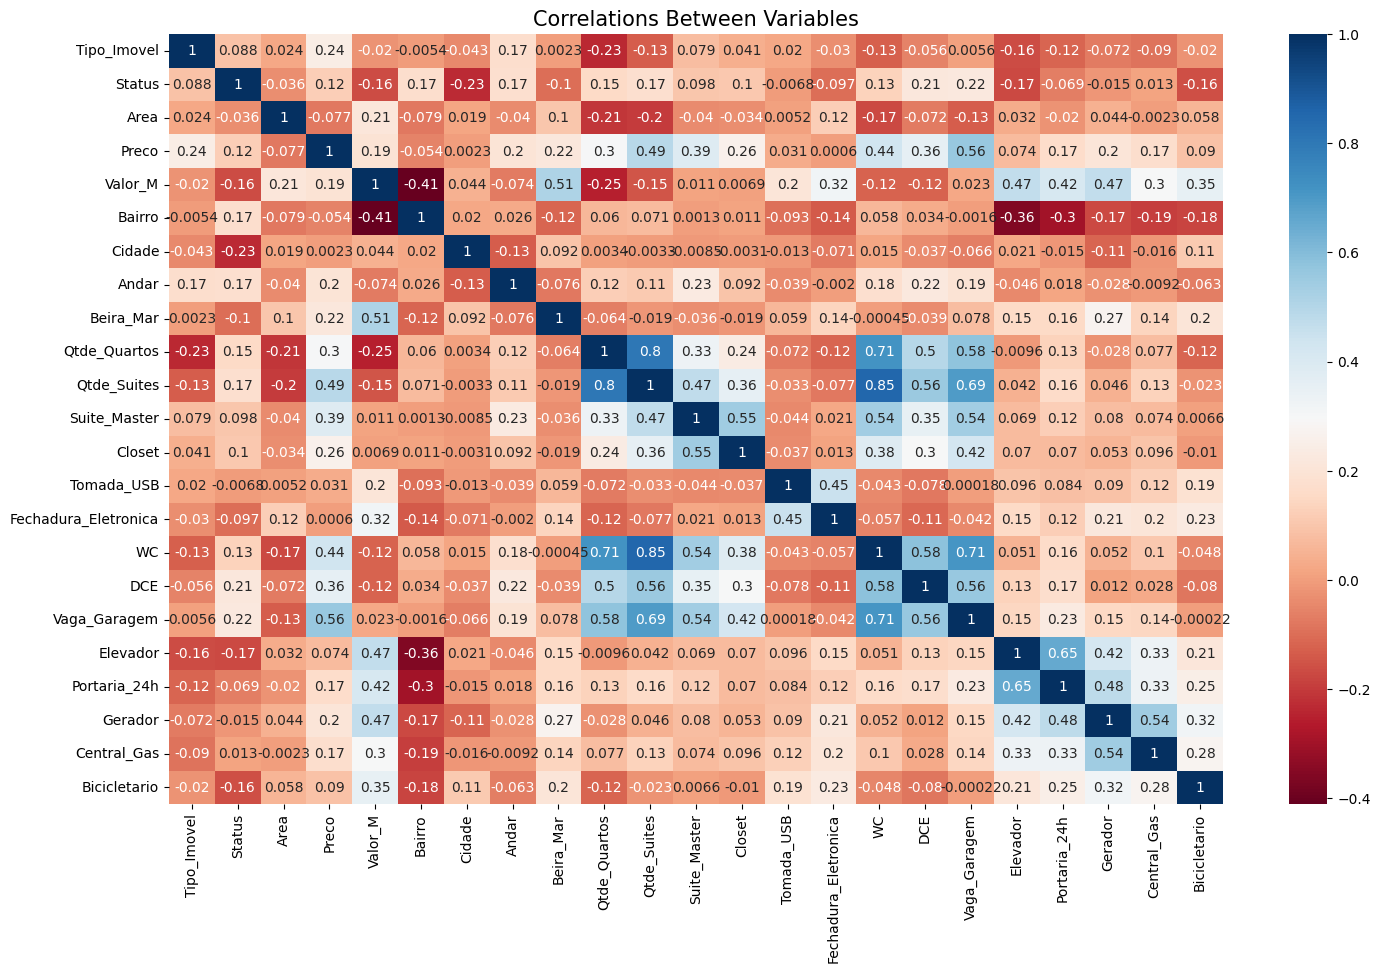

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
corr_matrix = data.corr().round(2)
corr_matrix

<ipython-input-26-6d855fc6fb3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().round(2)


,Tipo_Imovel,Status,Area,Preco,Valor_M,Bairro,Cidade,Andar,Beira_Mar,Qtde_Quartos,...,Tomada_USB,Fechadura_Eletronica,WC,DCE,Vaga_Garagem,Elevador,Portaria_24h,Gerador,Central_Gas,Bicicletario
Tipo_Imovel,1.00,0.09,0.02,0.24,-0.02,-0.01,-0.04,0.17,0.00,-0.23,...,0.02,-0.03,-0.13,-0.06,0.01,-0.16,-0.12,-0.07,-0.09,-0.02
Status,0.09,1.00,-0.04,0.12,-0.16,0.17,-0.23,0.17,-0.10,0.15,...,-0.01,-0.10,0.13,0.21,0.22,-0.17,-0.07,-0.02,0.01,-0.16
Area,0.02,-0.04,1.00,-0.08,0.21,-0.08,0.02,-0.04,0.10,-0.21,...,0.01,0.12,-0.17,-0.07,-0.13,0.03,-0.02,0.04,-0.00,0.06
Preco,0.24,0.12,-0.08,1.00,0.19,-0.05,0.00,0.20,0.22,0.30,...,0.03,0.00,0.44,0.36,0.56,0.07,0.17,0.20,0.17,0.09
Valor_M,-0.02,-0.16,0.21,0.19,1.00,-0.41,0.04,-0.07,0.51,-0.25,...,0.20,0.32,-0.12,-0.12,0.02,0.47,0.42,0.47,0.30,0.35
Bairro,-0.01,0.17,-0.08,-0.05,-0.41,1.00,0.02,0.03,-0.12,0.06,...,-0.09,-0.14,0.06,0.03,-0.00,-0.36,-0.30,-0.17,-0.19,-0.18
Cidade,-0.04,-0.23,0.02,0.00,0.04,0.02,1.00,-0.13,0.09,0.00,...,-0.01,-0.07,0.01,-0.04,-0.07,0.02,-0.02,-0.11,-0.02,0.11
Andar,0.17,0.17,-0.04,0.20,-0.07,0.03,-0.13,1.00,-0.08,0.12,...,-0.04,-0.00,0.18,0.22,0.19,-0.05,0.02,-0.03,-0.01,-0.06
Beira_Mar,0.00,-0.10,0.10,0.22,0.51,-0.12,0.09,-0.08,1.00,-0.06,...,0.06,0.14,-0.00,-0.04,0.08,0.15,0.16,0.27,0.14,0.20
Qtde_Quartos,-0.23,0.15,-0.21,0.30,-0.25,0.06,0.00,0.12,-0.06,1.00,...,-0.07,-0.12,0.71,0.50,0.58,-0.01,0.13,-0.03,0.08,-0.12


# **Geração sintética de imóveis usando GANs**

In [ ]:
!pip install tensorflow


ERROR: Operation cancelled by user


In [ ]:
import tensorflow as tf


In [ ]:
import sys
print(sys.version)


In [ ]:
from tensorflow.keras.models import Sequential, Model


In [ ]:
from tensorflow.keras.layers import Dense, Input


In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


In [ ]:
# Normalizar as colunas numéricas
data_numeric = data.select_dtypes(include=[np.number])
data_normalized = (data_numeric - data_numeric.mean()) / data_numeric.std()

In [ ]:
# Função de criação do gerador
def build_generator(input_dim, output_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(output_dim, activation='tanh')  # Saída no intervalo [-1, 1]
    ])
    return model

In [ ]:
input_dim = 50  # Selecione um valor adequado para input_dim
output_dim = data_normalized.shape[1]  # Número de colunas nos dados normalizados

In [ ]:
# Criação do gerador com input_dim e output_dim
generator = build_generator(input_dim, output_dim)


In [ ]:
# Função de criação do discriminador
def build_discriminator(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(1, activation='sigmoid')  # Saída binária: real ou falso
    ])
    return model

In [ ]:
# Construir e compilar o gerador e o discriminador
discriminator = build_discriminator(data_normalized.shape[1])
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

gan_input = Input(shape=(input_dim,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

In [ ]:
# Treinamento da GAN
epochs = 10000
batch_size = 62

In [ ]:
for epoch in range(epochs):
    noise = np.random.normal(0, 1, [batch_size, input_dim])
    generated_data = generator.predict(noise)
    real_data = data_normalized.values[np.random.randint(0, data_normalized.shape[0], batch_size)]
    combined_data = np.concatenate([real_data, generated_data])

    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += 0.05 * np.random.random(labels.shape)  # Adicionar ruído nas etiquetas

    d_loss = discriminator.train_on_batch(combined_data, labels)

    noise = np.random.normal(0, 1, [batch_size, input_dim])
    misleading_labels = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(noise, misleading_labels)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, D Accuracy: {100 * d_loss[1]}, G Loss: {a_loss}")


In [ ]:
# Desnormalizar os dados gerados
std_values = data_numeric.std().values
mean_values = data_numeric.mean().values

generated_data_desnormalized = generated_data * std_values + mean_values


In [ ]:
# Converter a matriz desnormalizada de volta para DataFrame
columns = data_numeric.columns
generated_df = pd.DataFrame(generated_data_desnormalized, columns=columns)


In [ ]:
# Adicionar os dados gerados desnormalizados ao conjunto de dados original
augmented_data = data.concat(generated_df, ignore_index=True)

In [ ]:
augmented_data.info()

# **Explorando os Dados**

In [ ]:
import plotly.express as px

## Comparandos todas as features com a coluna Preco

In [ ]:
# Selecionando apenas as colunas numéricas
colunas_numericas = data.select_dtypes(include=['float64', 'int64'])

# Criando scatter plots para cada coluna numérica em relação a "Preco"
for column in colunas_numericas.columns:
    if column != 'Preco':  # Evita plotar relação com ela mesma
        fig = px.scatter(data, x=column, y='Preco', title=f'Relação entre {column} e Preco')
        fig.show()

In [ ]:
# Selecionando apenas as colunas numéricas
numeric_columns_1 = data.select_dtypes(include=['float64', 'int64'])

# Criar density plot para cada coluna numérica em relação a "Preco"
for column in numeric_columns_1.columns:
    if column != 'Preco':
        fig = px.density_contour(data, x=column, y='Preco', title=f'Relação entre {column} e Preco')
        fig.show()

## Comparando todas as features com a coluna Valor por m²

In [ ]:
# Selecionando apenas as colunas numéricas
colunas_numericas_2 = data.select_dtypes(include=['float64', 'int64'])

# Criando scatter plots para cada coluna numérica em relação a "Valor_M"
for column in colunas_numericas_2.columns:
    if column != 'Valor_M':  # Evita plotar relação com ela mesma
        fig = px.scatter(data, x=column, y='Valor_M', title=f'Relação entre {column} e Valor_M')
        fig.show()

In [ ]:
# Selecionando apenas as colunas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Criar density plot para cada coluna numérica em relação a "Valor_M"
for column in numeric_columns.columns:
    if column != 'Valor_M':
        fig = px.density_contour(data, x=column, y='Valor_M', title=f'Relação entre {column} e Valor_M')
        fig.show()

In [ ]:
numeric_columns_2 = data.select_dtypes(include=['float64', 'int64'])

# Criar histograma para cada coluna numérica em relação a "Valor_M"
for column in numeric_columns_2.columns:
    if column != 'Valor_M':
        fig = px.histogram(data, x=column, nbins=20, title=f'Distribuição de {column} em relação a Valor_M')
        fig.show()

In [ ]:
data.info()

In [ ]:
# Calcula a matriz de correlação
correlation_matrix = data.corr()

# Gráfico de matriz de correlação usando o Plotly
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlação"),
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale='RdBu_r')
fig.update_layout(
    title="Matriz de Correlação",
    width=1000,
    height=1000)

fig.show()

# **Random Forest Regressor**




In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Separando as features  e o target
X = data.drop('Preco', axis=1)
y = data['Preco']

#  Colunas numéricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Usando apenas as colunas numéricas como features
X_final = X[numeric_cols]

model = RandomForestRegressor(random_state=42)

model.fit(X_final, y)

# Obter as importâncias das features
feature_importances = model.feature_importances_

# Criando um DataFrame com as importâncias das features
feature_importances_df = pd.DataFrame({'Feature': numeric_cols, 'Importance': feature_importances})

# Ordenar o DataFrame pela coluna 'Importance' de forma decrescente
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Imprima as features mais importantes
print(feature_importances_df)

                 Feature  Importance
2                   Area    0.671893
3                Valor_M    0.218590
14                    WC    0.053021
4                 Bairro    0.015225
16          Vaga_Garagem    0.012960
9            Qtde_Suites    0.007006
0            Tipo_Imovel    0.006534
8           Qtde_Quartos    0.004814
6                  Andar    0.001367
19               Gerador    0.001259
11                Closet    0.001068
1                 Status    0.001055
20           Central_Gas    0.000958
21          Bicicletario    0.000942
17              Elevador    0.000734
10          Suite_Master    0.000578
15                   DCE    0.000498
5                 Cidade    0.000444
18          Portaria_24h    0.000390
12            Tomada_USB    0.000321
7              Beira_Mar    0.000189
13  Fechadura_Eletronica    0.000154


# **01 - Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go



In [ ]:
# Selecionar as features relevantes
features = ['Area', 'WC', 'Bairro', 'Vaga_Garagem', 'Qtde_Suites', 'Tipo_Imovel',
                     'Qtde_Quartos', 'Gerador', 'Bicicletario', 'Central_Gas',
                      'Andar', 'Status', 'Elevador', 'DCE',
                      'Cidade', 'Portaria_24h', 'Beira_Mar', 'Valor_M', 'Closet']

# Dividir os dados em features (X) e target (y)
X = data[features]
y = data['Preco']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criar um DataFrame para os dados do gráfico
results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

# Criar o gráfico com Plotly
fig = px.scatter(results, x='Real', y='Previsto', title='Preços Reais vs. Preços Previstos',
                 labels={'Real': 'Preços Reais', 'Previsto': 'Preços Previstos'})

# Adicionar linha de tendência
fig.add_trace(go.Scatter(x=results['Real'], y=results['Real'], mode='lines', line=dict(dash='dash'), name='Linha'))

# Calcular o Erro Quadrático Médio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)

# Calcular o PVE (Porcentagem de Variação Explicada)
pve = r2 * 100

print(f'Porcentagem de Variação Explicada (PVE): {pve:.2f}%')
print(f'Erro Quadrático Médio (RMSE): {rmse}')
print(f'Erro Médio Absoluto (MAE): {mae}')
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

# Mostrar o gráfico
fig.show()


Porcentagem de Variação Explicada (PVE): 99.96%
Erro Quadrático Médio (RMSE): 11519.828693061743
Erro Médio Absoluto (MAE): 2817.817304269319
Erro Quadrático Médio (MSE): 132706453.11748862
Coeficiente de Determinação (R²): 0.9996497750278958


# **1.1 - Gráfico de Resíduos (Random Forest)**

In [ ]:
# Calcular os resíduos
residuals = y_test - y_pred

# Criar DataFrame para o gráfico de resíduos
residuals_df = pd.DataFrame({'Previsto': y_pred, 'Resíduos': residuals})

# Criar o gráfico de resíduos com Plotly
residuals_fig = px.scatter(residuals_df, x='Previsto', y='Resíduos', title='Gráfico de Resíduos',
                           labels={'Previsto': 'Valores Previstos', 'Resíduos': 'Resíduos'})

# Adicionar linha horizontal em y=0 com linha vermelha tracejada
residuals_fig.add_shape(dict(type="line", x0=min(y_pred), x1=max(y_pred), y0=0, y1=0, line=dict(color="red", dash="dash")))

# Mostrar o gráfico
residuals_fig.show()

## 1.1 - Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Choose the number of folds for cross-validation
num_folds = 10

# Create the model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
rmse_scores = cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_squared_error')
rmse_scores = -rmse_scores  # Convert negative scores to positive RMSE values

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print(f'Mean RMSE across {num_folds} folds: {mean_rmse}')
print(f'Standard Deviation of RMSE across {num_folds} folds: {std_rmse}')


Mean RMSE across 10 folds: 83202849.86501056
Standard Deviation of RMSE across 10 folds: 31033668.662972935


In [ ]:

# Definir uma coluna no DataFrame para indicar acertos e erros
results['Resultado'] = ['Acerto' if abs(real - previsto) <= rmse else 'Erro' for real, previsto in zip(results['Real'], results['Previsto'])]

# Criar o gráfico com Plotly
fig = px.scatter(results, x='Real', y='Previsto', color='Resultado',
                 title='Preços Reais vs. Preços Previstos (Acertos e Erros)',
                 labels={'Real': 'Preços Reais', 'Previsto': 'Preços Previstos'},
                 color_discrete_map={'Acerto': 'green', 'Erro': 'red'})

# Adicionar linha de tendência
fig.add_trace(px.scatter(results, x='Real', y='Real' ).data[0])

# Calcular o Erro Quadrático Médio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (RMSE): {rmse}')
print(f'Coeficiente de Determinação (R²): {r2}')

pve = r2 * 100
print(f'Porcentagem de Variação Explicada (PVE): {pve:.2f}%')


# Mostrar o gráfico
fig.show()


Erro Quadrático Médio (RMSE): 19429.6813094274
Coeficiente de Determinação (R²): 0.9990037085069777
Porcentagem de Variação Explicada (PVE): 99.90%


# **02 - Regressão Linear**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# Criar o modelo de regressão linear
linear_model = LinearRegression()

# Treinar o modelo de regressão linear
linear_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_linear = linear_model.predict(X_test)

# Calcular o Erro Quadrático Médio (RMSE)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

# Calcular o Erro Médio Absoluto (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Calcular o Erro Quadrático Médio (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calcular o Coeficiente de Determinação (R²)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Erro Quadrático Médio (RMSE) da Regressão Linear: {rmse_linear}')
print(f'Erro Médio Absoluto (MAE) da Regressão Linear: {mae_linear}')
print(f'Erro Quadrático Médio (MSE) da Regressão Linear: {mse_linear}')
print(f'Coeficiente de Determinação (R²) da Regressão Linear: {r2_linear}')
pve_linear = r2_linear * 100
print(f'Porcentagem de Variação Explicada (PVE) da Regressão Linear: {pve_linear:.2f}%')

# Criar um DataFrame para os dados do gráfico de dispersão
results_linear = pd.DataFrame({'Real': y_test, 'Previsto (Linear)': y_pred_linear})

# Plotar o gráfico de dispersão da regressão linear
fig_linear = px.scatter(results_linear, x='Real', y='Previsto (Linear)',
                        title='Preços Reais vs. Preços Previstos (Regressão Linear)',
                        labels={'Real': 'Preços Reais', 'Previsto (Linear)': 'Preços Previstos (Regressão Linear)'})

# Adicionar linha de tendência
fig_linear.add_trace(go.Scatter(x=results_linear['Real'], y=results_linear['Real'], mode='lines', name='Linha de Tendência'))


# Mostrar o gráfico da regressão linear
fig_linear.show()



Erro Quadrático Médio (RMSE) da Regressão Linear: 430032.6358720459
Erro Médio Absoluto (MAE) da Regressão Linear: 215643.6754532017
Erro Quadrático Médio (MSE) da Regressão Linear: 184928067915.0596
Coeficiente de Determinação (R²) da Regressão Linear: 0.5119572115343816
Porcentagem de Variação Explicada (PVE) da Regressão Linear: 51.20%


# **03- Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Criar o modelo GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_gb = gb_model.predict(X_test)

# Calcular o Erro Quadrático Médio (RMSE)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

# Calcular o Erro Médio Absoluto (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Calcular o Erro Quadrático Médio (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Calcular o Coeficiente de Determinação (R²)
r2_gb = r2_score(y_test, y_pred_gb)

# Porcentagem de Variação Explicada (PVE) para GradientBoostingRegressor
pve_gb = r2_gb * 100

# Mostrar métricas
print(f'Erro Quadrático Médio (RMSE) do GradientBoostingRegressor: {rmse_gb}')
print(f'Erro Médio Absoluto (MAE) do GradientBoostingRegressor: {mae_gb}')
print(f'Erro Quadrático Médio (MSE) do GradientBoostingRegressor: {mse_gb}')
print(f'Coeficiente de Determinação (R²) do GradientBoostingRegressor: {r2_gb}')
print(f'Porcentagem de Variação Explicada (PVE) do GradientBoostingRegressor: {pve_gb:.2f}%')

# Criar um DataFrame para os dados do gráfico do GradientBoostingRegressor
results_gb = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_gb})

# Criar o gráfico com Plotly para GradientBoostingRegressor
fig_gb = px.scatter(results_gb, x='Real', y='Previsto', title='Preços Reais vs. Preços Previstos (GradientBoostingRegressor)',
                 labels={'Real': 'Preços Reais', 'Previsto': 'Preços Previstos'})

# Adicionar linha de tendência
fig_gb.add_trace(go.Scatter(x=results_gb['Real'], y=results_gb['Real'], mode='lines', name='Linha de Tendência'))



# Mostrar o gráfico
fig_gb.show()

Erro Quadrático Médio (RMSE) do GradientBoostingRegressor: 52624.941422934186
Erro Médio Absoluto (MAE) do GradientBoostingRegressor: 34412.17818984958
Erro Quadrático Médio (MSE) do GradientBoostingRegressor: 2769384459.7672544
Coeficiente de Determinação (R²) do GradientBoostingRegressor: 0.9926913305842845
Porcentagem de Variação Explicada (PVE) do GradientBoostingRegressor: 99.27%


# **04 - Regressão Ridge**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Criar o modelo Ridge
ridge_model = Ridge(alpha=2.0)  # Pode ajustar o valor de alpha conforme necessário

# Treinar o modelo
ridge_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_ridge = ridge_model.predict(X_test)

# Calcular o Erro Quadrático Médio (RMSE)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Calcular o Erro Médio Absoluto (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calcular o Erro Quadrático Médio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calcular o Coeficiente de Determinação (R²)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Porcentagem de Variação Explicada (PVE) para Ridge
pve_ridge = r2_ridge * 100

# Mostrar métricas
print(f'Erro Quadrático Médio (RMSE) do Ridge: {rmse_ridge}')
print(f'Erro Médio Absoluto (MAE) do Ridge: {mae_ridge}')
print(f'Erro Quadrático Médio (MSE) do Ridge: {mse_ridge}')
print(f'Coeficiente de Determinação (R²) do Ridge: {r2_ridge}')
print(f'Porcentagem de Variação Explicada (PVE) do Ridge: {pve_ridge:.2f}%')

# Criar um DataFrame para os dados do gráfico Ridge
results_ridge = pd.DataFrame({'Real': y_test, 'Previsto (Ridge)': y_pred_ridge})

# Criar o gráfico com Plotly
fig_ridge = px.scatter(results_ridge, x='Real', y='Previsto (Ridge)',
                       title='Preços Reais vs. Preços Previstos (Ridge)',
                       labels={'Real': 'Preços Reais', 'Previsto (Ridge)': 'Preços Previstos (Ridge)'})

# Adicionar linha de tendência
fig_ridge.add_trace(go.Scatter(x=results_ridge['Real'], y=results_ridge['Real'], mode='lines', name='Linha de Tendência'))

# Mostrar o gráfico
fig_ridge.show()




Erro Quadrático Médio (RMSE) do Ridge: 430053.5262122705
Erro Médio Absoluto (MAE) do Ridge: 215422.74433078294
Erro Quadrático Médio (MSE) do Ridge: 184946035407.608
Coeficiente de Determinação (R²) do Ridge: 0.5119097936098667
Porcentagem de Variação Explicada (PVE) do Ridge: 51.19%


# **05 - Lasso**

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:

# Criar o modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Defina o valor de alpha conforme necessário

# Treinar o modelo
lasso_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_lasso = lasso_model.predict(X_test)

# Calcular o Erro Quadrático Médio (RMSE) do Lasso
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Calcular o Coeficiente de Determinação (R²) do Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calcular a Porcentagem de Variação Explicada (PVE) do Lasso
pve_lasso = (1 - (np.var(y_test - y_pred_lasso) / np.var(y_test))) * 100

# Calcular o Erro Médio Absoluto (MAE) do Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Calcular o Erro Quadrático Médio (MSE) do Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Mostrar métricas do Lasso
print(f'Erro Quadrático Médio (RMSE) do Lasso: {rmse_lasso}')
print(f'Erro Médio Absoluto (MAE) do Lasso: {mae_lasso}')
print(f'Erro Quadrático Médio (MSE) do Lasso: {mse_lasso}')
print(f'Coeficiente de Determinação (R²) do Lasso: {r2_lasso}')
print(f'Porcentagem de Variação Explicada (PVE) do Lasso: {pve_lasso:.2f}%')

# Criar um DataFrame para os dados do gráfico Lasso
results_lasso = pd.DataFrame({'Real': y_test, 'Previsto (Lasso)': y_pred_lasso})

# Criar o gráfico com Plotly
fig_lasso = px.scatter(results_lasso, x='Real', y='Previsto (Lasso)',
                       title='Preços Reais vs. Preços Previstos (Lasso)',
                       labels={'Real': 'Preços Reais', 'Previsto (Lasso)': 'Preços Previstos (Lasso)'})

# Adicionar linha de tendência
fig_lasso.add_trace(go.Scatter(x=results_lasso['Real'], y=results_lasso['Real'], mode='lines', name='Linha de Tendência'))
# Mostrar o gráfico
fig_lasso.show()




Erro Quadrático Médio (RMSE) do Lasso: 430032.6029750546
Erro Médio Absoluto (MAE) do Lasso: 215643.4253063851
Erro Quadrático Médio (MSE) do Lasso: 184928039621.50092
Coeficiente de Determinação (R²) do Lasso: 0.5119572862037782
Porcentagem de Variação Explicada (PVE) do Lasso: 51.20%


# **06- ElasticNet**





In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Criar o modelo Elastic Net
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Ajuste alpha e l1_ratio conforme necessário

# Treinar o modelo
elastic_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = elastic_model.predict(X_test)

# Calcular o Erro Quadrático Médio (RMSE) do Elastic Net
rmse_elastic = mean_squared_error(y_test, y_pred, squared=False)

# Calcular o Erro Médio Absoluto (MAE) do Elastic Net
mae_elastic = mean_absolute_error(y_test, y_pred)

# Calcular o Erro Quadrático Médio (MSE) do Elastic Net
mse_elastic = mean_squared_error(y_test, y_pred)

# Calcular o Coeficiente de Determinação (R²) do Elastic Net
r2_elastic = r2_score(y_test, y_pred)

# Porcentagem de Variação Explicada (PVE) do Elastic Net
pve_elastic = r2_elastic * 100

# Mostrar métricas do Elastic Net
print(f'Erro Quadrático Médio (RMSE) do Elastic Net: {rmse_elastic}')
print(f'Erro Médio Absoluto (MAE) do Elastic Net: {mae_elastic}')
print(f'Erro Quadrático Médio (MSE) do Elastic Net: {mse_elastic}')
print(f'Coeficiente de Determinação (R²) do Elastic Net: {r2_elastic}')
print(f'Porcentagem de Variação Explicada (PVE) do Elastic Net: {pve_elastic:.2f}%')


# Criar um DataFrame para os dados do gráfico
results_elastic = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

# Criar o gráfico com Plotly
fig_elastic = px.scatter(results_elastic, x='Real', y='Previsto', title='Preços Reais vs. Preços Previstos (Elastic Net)',
                         labels={'Real': 'Preços Reais', 'Previsto': 'Preços Previstos'})

# Adicionar linha de tendência
fig_elastic.add_trace(go.Scatter(x=results_elastic['Real'], y=results_elastic['Real'], mode='lines', name='Linha de Tendência'))

# Mostrar o gráfico
fig_elastic.show()

Erro Quadrático Médio (RMSE) do Elastic Net: 456053.0409210126
Erro Médio Absoluto (MAE) do Elastic Net: 220010.87507242893
Erro Quadrático Médio (MSE) do Elastic Net: 207984376133.3028
Coeficiente de Determinação (R²) do Elastic Net: 0.4511094176790831
Porcentagem de Variação Explicada (PVE) do Elastic Net: 45.11%


# **Comparando os Modelos**

In [ ]:
# Dados das métricas para cada modelo
model_names = ['Random Forest', 'Gradient Boosting', 'Regressão Linear', 'Lasso','Ridge', 'Elastic Net']
metrics = ['RMSE', 'MAE', 'MSE', 'R²', 'PVE']
values = [
    [rmse, mae, mse, r2, pve],
    [rmse_gb, mae_gb, mse_gb, r2_gb, pve_gb],
    [rmse_linear, mae_linear, mse_linear, r2_linear, pve_linear],
    [rmse_lasso, mae_lasso, mse_lasso, r2_lasso, pve_lasso],
    [rmse_ridge, mae_ridge, mse_ridge, r2_ridge, pve_ridge],
    [rmse_elastic, mae_elastic, mse_elastic, r2_elastic, pve_elastic]
]


# Criar um DataFrame para os dados
data = []
for i, metric in enumerate(metrics):
    for j, model_name in enumerate(model_names):
        data.append((model_name, metric, values[j][i]))
df = pd.DataFrame(data, columns=['Modelo', 'Métrica', 'Valor'])

# Criar o gráfico com Plotly
fig = px.bar(df, x='Modelo', y='Valor', color='Métrica', barmode='group',
             labels={'Modelo': 'Modelo de Regressão', 'Valor': 'Valor da Métrica'},
             title='Comparação de Modelos de Regressão')

# Mostrar o gráfico
fig.show()

Com base nas métricas fornecidas, o modelo de Random Forest parece ser o melhor em termos de precisão, uma vez que apresenta os menores valores de RMSE e MAE, juntamente com altos valores de R² e PVE. No entanto, é importante considerar também outros fatores, como a interpretabilidade do modelo, requisitos computacionais e contexto do problema, ao escolher o melhor modelo para sua aplicação específica.



*   O modelo com o menor valor de RMSE e MAE é geralmente considerado o melhor em termos de precisão.
*   Um valor alto para R² e PVE indica que o modelo é capaz de explicar uma porcentagem significativa da variação nos dados.


In [ ]:
import plotly.graph_objects as go

# Dados das métricas para cada modelo
model_names = ['Random Forest', 'Gradient Boosting', 'Regressão Linear', 'Lasso', 'Ridge', 'Elastic Net']
metrics = ['RMSE', 'MAE', 'MSE', 'R²', 'PVE']
values = [
    [rmse, mae, mse, r2, pve],
    [rmse_gb, mae_gb, mse_gb, r2_gb, pve_gb],
    [rmse_linear, mae_linear, mse_linear, r2_linear, pve_linear],
    [rmse_lasso, mae_lasso, mse_lasso, r2_lasso, pve_lasso],
    [rmse_ridge, mae_ridge, mse_ridge, r2_ridge, pve_ridge],
    [rmse_elastic, mae_elastic, mse_elastic, r2_elastic, pve_elastic]
]

# Criar um DataFrame para os dados
data = []
for i, metric in enumerate(metrics):
    row = {'Métrica': metric}
    for j, model_name in enumerate(model_names):
        row[model_name] = values[j][i]
    data.append(row)

df = pd.DataFrame(data)

# Criar a tabela dinâmica com Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=df.columns),
    cells=dict(values=[df.Métrica] + [df[model] for model in model_names]))
])

table.show()


# **Avaliando o imóvel com Randon Forest**

In [ ]:
from ipywidgets import interact, widgets
from IPython.display import clear_output

import joblib


In [ ]:
# Função para prever o valor com base nas características inseridas
def predict_price( Cidade, Bairro, Tipo_Imovel, Andar, Status,Area,Valor_M, Qtde_Quartos,
                  Qtde_Suites, WC, DCE, Vaga_Garagem,
                  Beira_Mar, Elevador, Portaria_24h,
                  Gerador, Central_Gas, Bicicletario, Closet ):


    # Mapear as seleções para seus valores numéricos correspondentes
    Cidade_encoded = cidade_mapping[Cidade]
    Bairro_encoded = bairro_mapping[Bairro]
    Tipo_Imovel_encoded = tipo_imovel_mapping[Tipo_Imovel]
    Andar_encoded = andar_mapping[Andar]
    Status_encoded = status_mapping[Status]

    example = [[Area, Beira_Mar,Valor_M, Closet,Qtde_Quartos, Qtde_Suites, WC, DCE, Vaga_Garagem, Elevador, Portaria_24h,
                  Gerador, Central_Gas, Bicicletario, Cidade_encoded, Bairro_encoded, Tipo_Imovel_encoded, Andar_encoded, Status_encoded]]

    predicted_price = model.predict(example)

    return f"Preço Previsto: R$ {predicted_price[0]:,.2f}"

# Criar widgets de input para cada característica
Area_widget = widgets.IntSlider(min=50, max=500, value=100, description="Área (m²):")
Valor_M_widget = widgets.IntSlider(min=0, max=20000, value=2000, description="Valor do m²:")
Cidade_widget = widgets.Dropdown(options=cidade_mapping.keys(), description="Cidade:")
Bairro_widget = widgets.Dropdown(options=bairro_mapping.keys(), description="Bairro:")
Tipo_Imovel_widget = widgets.Dropdown(options=tipo_imovel_mapping.keys(), description="Tipo de Imóvel:")
Andar_widget = widgets.Dropdown(options=andar_mapping.keys(), description="Andar:")
Status_widget = widgets.Dropdown(options=status_mapping.keys(), description="Status:")

Qtde_Quartos_widget = widgets.IntSlider(min=0, max=10, value=1, description="Quartos:")
Qtde_Suites_widget = widgets.IntSlider(min=0, max=5, value=2, description="Suítes:")
WC_widget = widgets.IntSlider(min=0, max=5, value=1, description="WC:")
DCE_widget = widgets.IntSlider(min=0, max=3, value=1, description="DCE:")
Vaga_Garagem_widget = widgets.IntSlider(min=0, max=4, value=1, description="Vaga de Garagem:")

Beira_Mar_widget = widgets.Checkbox(description="Beira Mar")
Elevador_widget = widgets.Checkbox(description="Elevador")
Portaria_24h_widget = widgets.Checkbox(description="Portaria 24h")
Gerador_widget = widgets.Checkbox(description="Gerador")
Central_Gas_widget = widgets.Checkbox(description="Central Gas")
Bicicletario_widget = widgets.Checkbox(description="Bicicletário")
Closet_widget = widgets.Checkbox(description="Closet")


# Função para exibir a previsão quando o botão for clicado
def show_prediction(button):
    with out:
        clear_output(wait=True)
        print(predict_price(
            Cidade=Cidade_widget.value,
            Bairro=Bairro_widget.value,
            Tipo_Imovel=Tipo_Imovel_widget.value,
            Andar=Andar_widget.value,
            Status=Status_widget.value,
            Area=Area_widget.value,
            Valor_M=Valor_M_widget.value,
            Qtde_Quartos=Qtde_Quartos_widget.value,
            Qtde_Suites=Qtde_Suites_widget.value,
            WC=WC_widget.value,
            DCE=DCE_widget.value,
            Vaga_Garagem=Vaga_Garagem_widget.value,
            Beira_Mar=Beira_Mar_widget.value,
            Elevador=Elevador_widget.value,
            Portaria_24h=Portaria_24h_widget.value,
            Gerador=Gerador_widget.value,
            Central_Gas=Central_Gas_widget.value,
            Bicicletario=Bicicletario_widget.value,
            Closet =Closet_widget.value
        ))

# Criar botão de previsão
predict_button = widgets.Button(description="Prever Preço")
predict_button.on_click(show_prediction)

# Criar área de saída
out = widgets.Output()

# Exibir widgets e botão
widgets.VBox([
    Area_widget,
    Valor_M_widget,
    Cidade_widget,
    Bairro_widget,
    Tipo_Imovel_widget,
    Andar_widget,
    Status_widget,
    Qtde_Quartos_widget,
    Qtde_Suites_widget,
    WC_widget,
    DCE_widget,
    Vaga_Garagem_widget,
    Beira_Mar_widget,
    Elevador_widget,
    Portaria_24h_widget,
    Gerador_widget,
    Central_Gas_widget,
    Bicicletario_widget,
    Closet_widget,
    predict_button,
    out
])



['modelo.pkl']

In [ ]:
joblib.dump(model, '/content/drive/MyDrive/Imoveismodelo.pkl')


['/content/drive/MyDrive/Imoveismodelo.pkl']